# Boston House Pricing Prediction using Regression

In this notebook, we will make a house pricing prediction model to solve a supervised regression problem using the Boston housing price dataset.

## Objectives

* Solve a supervised regression problem
* Analyze and visualize dataset using seaborn
* Find out the best regression model for the problem

## Import 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

## Load the dataset

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

dataset = load_boston()

In [3]:
# Get some information from the dataset
print('Keys: {}'.format(dataset.keys()))
print('Features shape: {}'.format(dataset.data.shape))
print('Target shape: {}'.format(dataset.target.shape))

Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
Features shape: (506, 13)
Target shape: (506,)


In [4]:
# Get the column names
print('Feature Names')
dataset.feature_names

Feature Names


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
# Get more information about the column
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Analyze the dataset

In [6]:
# convert the dataset to pandas dataframe
df = pd.DataFrame(dataset.data)
print('df.shape: {}'.format(df.shape))
df.head()

df.shape: (506, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33


In [7]:
# Set the dataframe columns
df.columns = dataset.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33


In [8]:
# inserting the target column to the dataset
df['PRICE'] = dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [9]:
# Check the column datatype
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [10]:
# Check missing values 
df.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [11]:
# statistic summary of the dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


## Correlation

We will check the correlation between attributes to check for patterns in the dataset.

In [12]:
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [13]:
df.corr(method='kendall')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.46,0.52,0.03,0.60,-0.21,0.50,-0.54,0.56,0.54,0.31,-0.26,0.45,-0.40
ZN,-0.46,1.00,-0.54,-0.04,-0.51,0.28,-0.43,0.48,-0.23,-0.29,-0.36,0.13,-0.39,0.34
INDUS,0.52,-0.54,1.00,0.08,0.61,-0.29,0.49,-0.57,0.35,0.48,0.34,-0.19,0.47,-0.42
CHAS,0.03,-0.04,0.08,1.00,0.06,0.05,0.06,-0.07,0.02,-0.04,-0.12,-0.03,-0.04,0.12
NOX,0.60,-0.51,0.61,0.06,1.00,-0.22,0.59,-0.68,0.43,0.45,0.28,-0.20,0.45,-0.39
RM,-0.21,0.28,-0.29,0.05,-0.22,1.00,-0.19,0.18,-0.08,-0.19,-0.22,0.03,-0.47,0.48
AGE,0.50,-0.43,0.49,0.06,0.59,-0.19,1.00,-0.61,0.31,0.36,0.25,-0.15,0.49,-0.39
DIS,-0.54,0.48,-0.57,-0.07,-0.68,0.18,-0.61,1.00,-0.36,-0.38,-0.22,0.17,-0.41,0.31
RAD,0.56,-0.23,0.35,0.02,0.43,-0.08,0.31,-0.36,1.00,0.56,0.25,-0.21,0.29,-0.25
TAX,0.54,-0.29,0.48,-0.04,0.45,-0.19,0.36,-0.38,0.56,1.00,0.29,-0.24,0.38,-0.41


In [14]:
df.corr(method='spearman')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.57,0.74,0.04,0.82,-0.31,0.70,-0.74,0.73,0.73,0.47,-0.36,0.63,-0.56
ZN,-0.57,1.00,-0.64,-0.04,-0.63,0.36,-0.54,0.61,-0.28,-0.37,-0.45,0.16,-0.49,0.44
INDUS,0.74,-0.64,1.00,0.09,0.79,-0.42,0.68,-0.76,0.46,0.66,0.43,-0.29,0.64,-0.58
CHAS,0.04,-0.04,0.09,1.00,0.07,0.06,0.07,-0.08,0.02,-0.04,-0.14,-0.04,-0.05,0.14
NOX,0.82,-0.63,0.79,0.07,1.00,-0.31,0.80,-0.88,0.59,0.65,0.39,-0.30,0.64,-0.56
RM,-0.31,0.36,-0.42,0.06,-0.31,1.00,-0.28,0.26,-0.11,-0.27,-0.31,0.05,-0.64,0.63
AGE,0.70,-0.54,0.68,0.07,0.80,-0.28,1.00,-0.80,0.42,0.53,0.36,-0.23,0.66,-0.55
DIS,-0.74,0.61,-0.76,-0.08,-0.88,0.26,-0.80,1.00,-0.50,-0.57,-0.32,0.25,-0.56,0.45
RAD,0.73,-0.28,0.46,0.02,0.59,-0.11,0.42,-0.50,1.00,0.70,0.32,-0.28,0.39,-0.35
TAX,0.73,-0.37,0.66,-0.04,0.65,-0.27,0.53,-0.57,0.70,1.00,0.45,-0.33,0.53,-0.56


## Visualize the dataset

### Box Plot

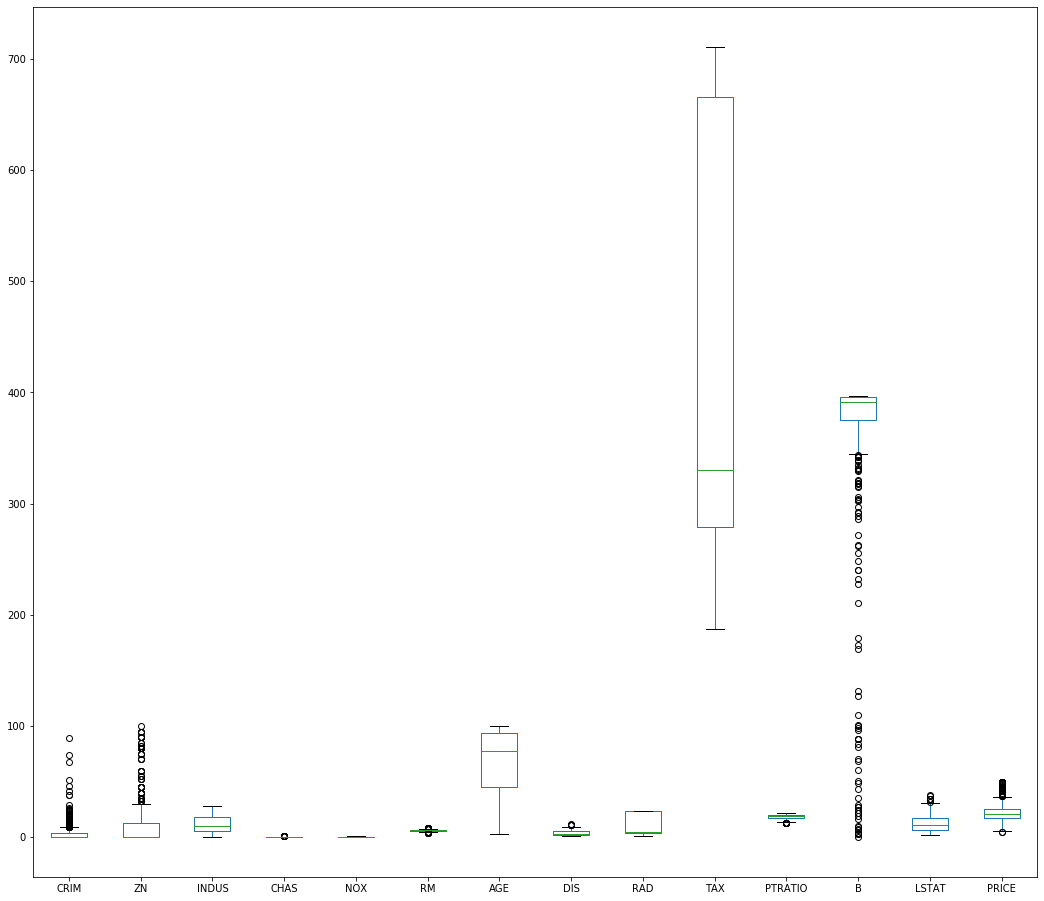

In [15]:
df.plot(kind='box', figsize=(18,16))
# alternative:
# for column in df:
#     plt.figure()
#     df.boxplot([column])

From the boxplot, we can see that there are outliers in these features: CRIM, ZN, CHAS, RM, DIS, PTRATIO, B, LSTAT, PRICE

### Density Plot

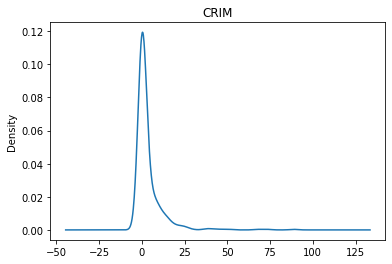

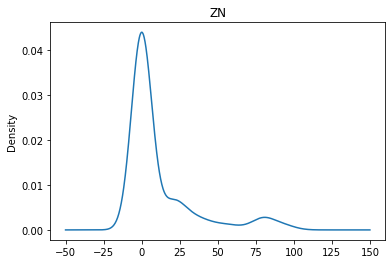

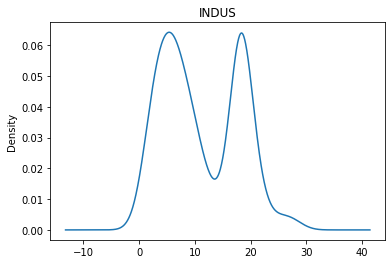

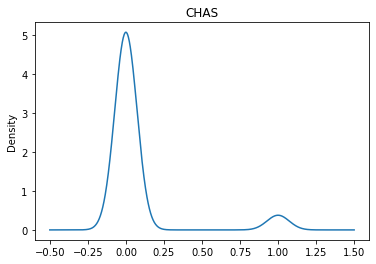

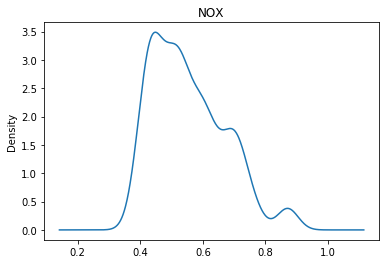

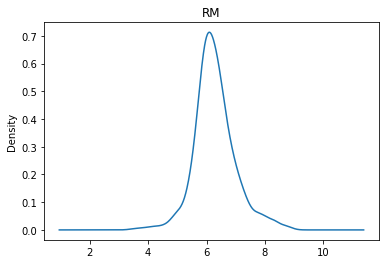

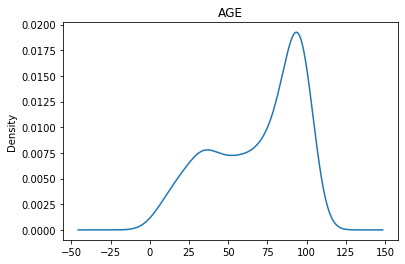

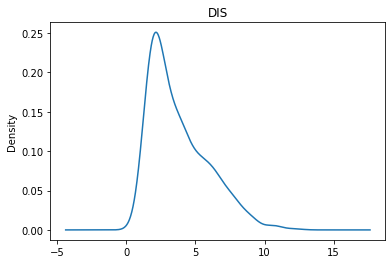

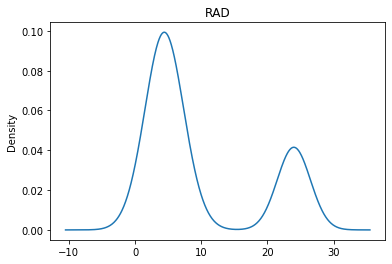

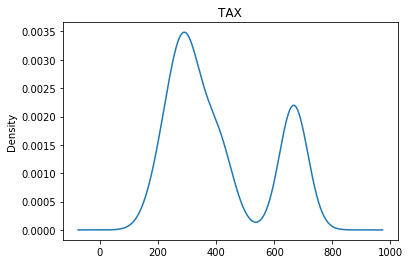

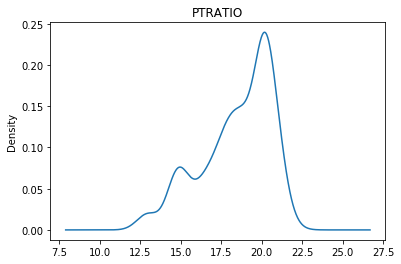

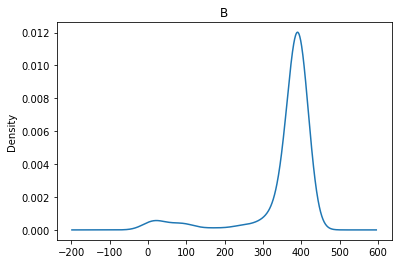

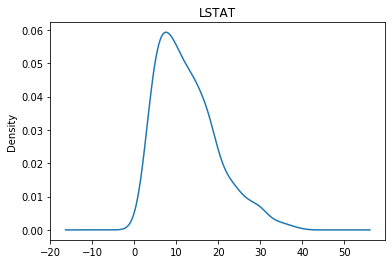

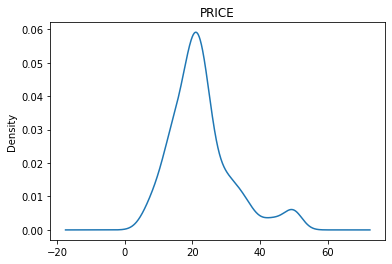

In [16]:
#df.plot(kind='kde', figsize=(10,8))

for column in df:
    plt.figure()
    plt.title(column)
    df[column].plot.kde()

### Histogram

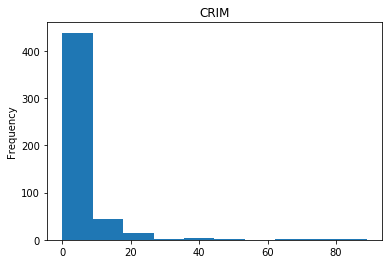

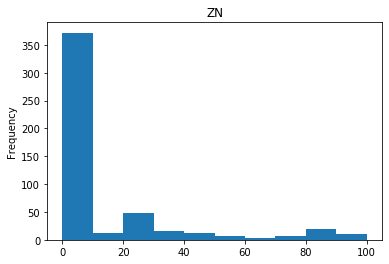

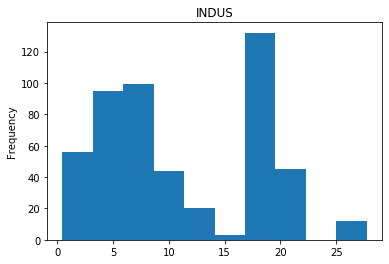

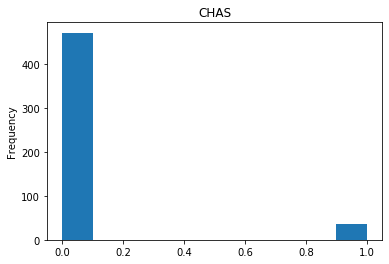

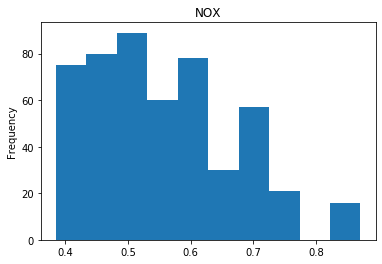

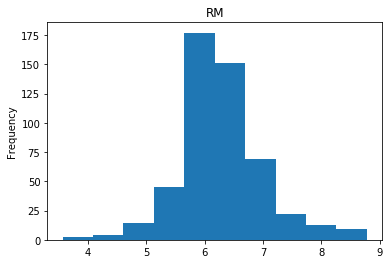

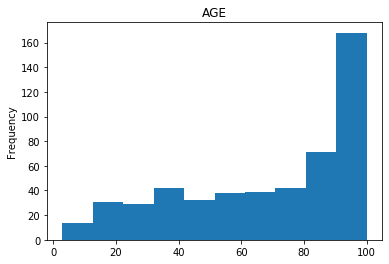

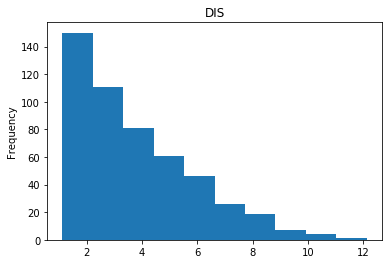

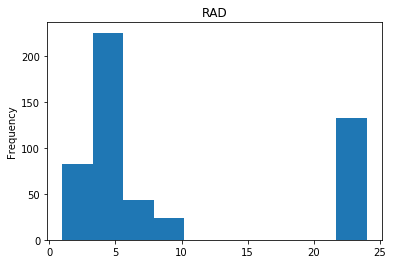

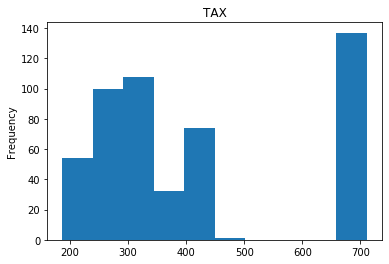

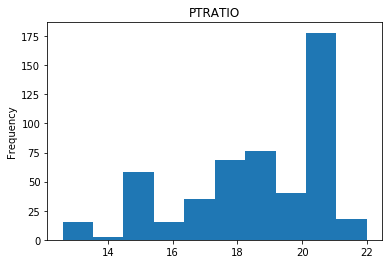

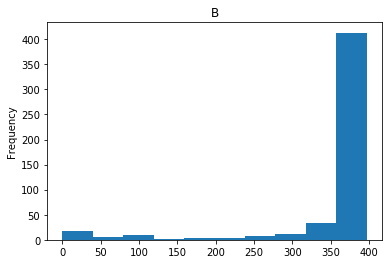

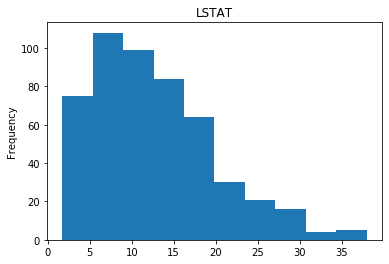

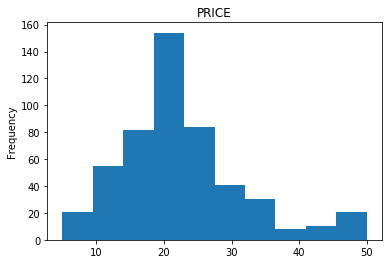

In [17]:
for column in df:
    plt.figure()
    plt.title(column)
    df[column].plot.hist()

From the visualizations, we can see there are different data distributions and differing scales of data. 

## Normalized and Splitting the dataset

In [18]:
# Split the dataframe into features X and target y
X = df.drop('PRICE', axis = 1)
y = df.PRICE
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [19]:
# normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [20]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=6)

print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


## Training Regression Models

In [21]:
# import modules
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

In [22]:
# define some variables
seed = 7
folds = 10
metric = 'neg_mean_squared_error'

In [23]:
# dictionary for regression models
models = {}
models['Linear'] = LinearRegression()
models['Lasso'] = Lasso()
models['ElasticNet'] = ElasticNet()
models['DecisionTree'] = DecisionTreeRegressor()
models['KNN'] = KNeighborsRegressor()
models['SVR'] = SVR(gamma='auto')
models['AdaBoost'] = AdaBoostRegressor()
models['GradientBoost'] = GradientBoostingRegressor()
models['RandomForest'] = RandomForestRegressor(n_estimators=100)
models['ExtraTrees'] = ExtraTreesRegressor(n_estimators=100)

In [24]:
# 10-fold cross validation for each model
model_results = []
model_names = []

for model_name in models:
    model = models[model_name]
    k_fold = KFold(n_splits=folds, random_state=seed)
    results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)
    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

Linear: -23.362, 7.18
Lasso: -64.871, 14.334
ElasticNet: -70.777, 15.199
DecisionTree: -27.678, 7.978
KNN: -23.327, 7.345
SVR: -53.776, 15.042
AdaBoost: -14.69, 6.053
GradientBoost: -11.613, 5.611
RandomForest: -12.88, 5.865
ExtraTrees: -11.013, 4.427


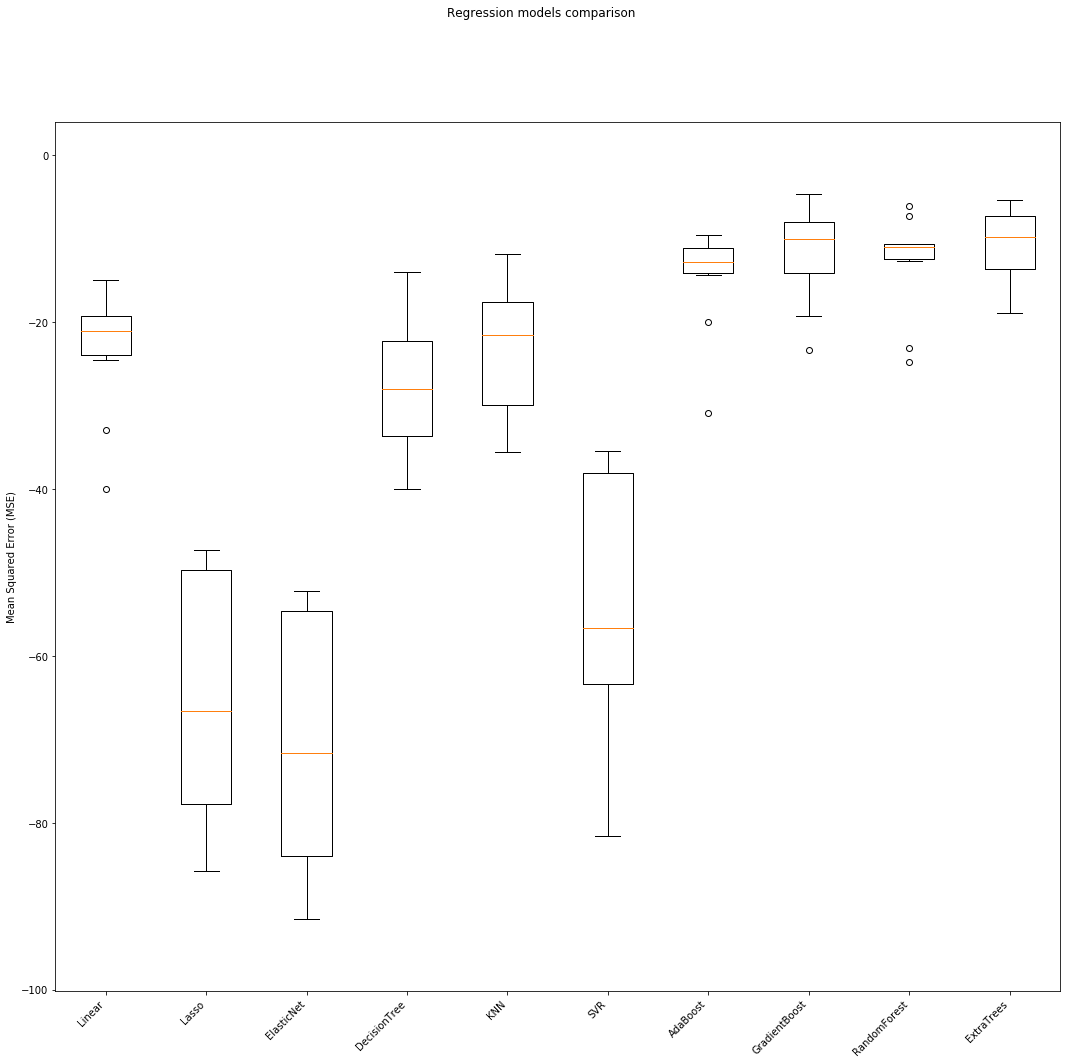

In [25]:
# visualize box plot to compare regression models
figure =  plt.figure(figsize=(18,16))
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation=45, ha='right')
axis.set_ylabel('Mean Squared Error (MSE)')
plt.margins(0.05, 0.1)
plt.show()

Based on the above comparison, we can see that some models that have a good performance: GradientBoost, RandomForest and ExtraTrees, and currently the Extratrees model has the lowest value, so we'll choose it as the regression model.
However, we will use the three models when doing fine tuning (for comparison).

In [26]:
# create and fit the Regression Model
reg_model = ExtraTreesRegressor(n_estimators=100, random_state=seed)
reg_model.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                    oob_score=False, random_state=7, verbose=0,
                    warm_start=False)

In [27]:
# make predictions
predict = reg_model.predict(X_test)
print("MSE: {}".format(round(mean_squared_error(y_test, predict), 3)))

MSE: 11.465


In [28]:
accuracy = reg_model.score(X_test, y_test)
print('Accuracy: {0:.2%}'.format(accuracy))

Accuracy: 86.69%


### Fine Tuning The Model

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [75, 100, 150],
               'max_features': [5, 8, 13],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 3, 4]}]

In [31]:
# Fine Tuning Extra Trees Regression Model
reg_model = ExtraTreesRegressor(random_state=seed)
gsc = GridSearchCV(reg_model, param_grid, cv=5, scoring=metric, return_train_score=True, error_score=np.nan)
et_grid_result = gsc.fit(X_train,y_train)

print('[Extra Trees Regression Model]')
print('best {} using {}'.format(et_grid_result.best_score_, et_grid_result.best_params_))

[Extra Trees Regression Model]
best -10.338546371287123 using {'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [32]:
# Fine Tuning Random Forest Regression Model
reg_model = RandomForestRegressor(random_state=seed)
gsc = GridSearchCV(reg_model, param_grid, cv=5, scoring=metric, return_train_score=True, error_score=np.nan)
rf_grid_result = gsc.fit(X_train,y_train)

print('[Random Forest Regression Model]')
print('best {} using {}'.format(rf_grid_result.best_score_, rf_grid_result.best_params_))

[Random Forest Regression Model]
best -12.137441983481686 using {'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}


In [33]:
# Fine Tuning Gradient Boosting Regression Model
reg_model = GradientBoostingRegressor(random_state=seed)
gsc = GridSearchCV(reg_model, param_grid, cv=5, scoring=metric, return_train_score=True, error_score=np.nan)
gb_grid_result = gsc.fit(X_train,y_train)

print('[Gradient Boosting Regression Model]')
print('best {} using {}'.format(gb_grid_result.best_score_, gb_grid_result.best_params_))

[Gradient Boosting Regression Model]
best -11.28290991770193 using {'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}


Looks like from the model tuning, Extra Trees models still give the best result.
We will use Extra Trees model as our best model for this problem.

In [34]:
# create and fit the Regression Model
best_model = ExtraTreesRegressor(**et_grid_result.best_params_)
best_model.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features=8, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [35]:
# make predictions
predict = best_model.predict(X_test)
print("MSE: {}".format(round(mean_squared_error(y_test, predict), 3)))

MSE: 10.209


In [36]:
accuracy = best_model.score(X_test, y_test)
print('Accuracy: {0:.2%}'.format(accuracy))

Accuracy: 88.15%


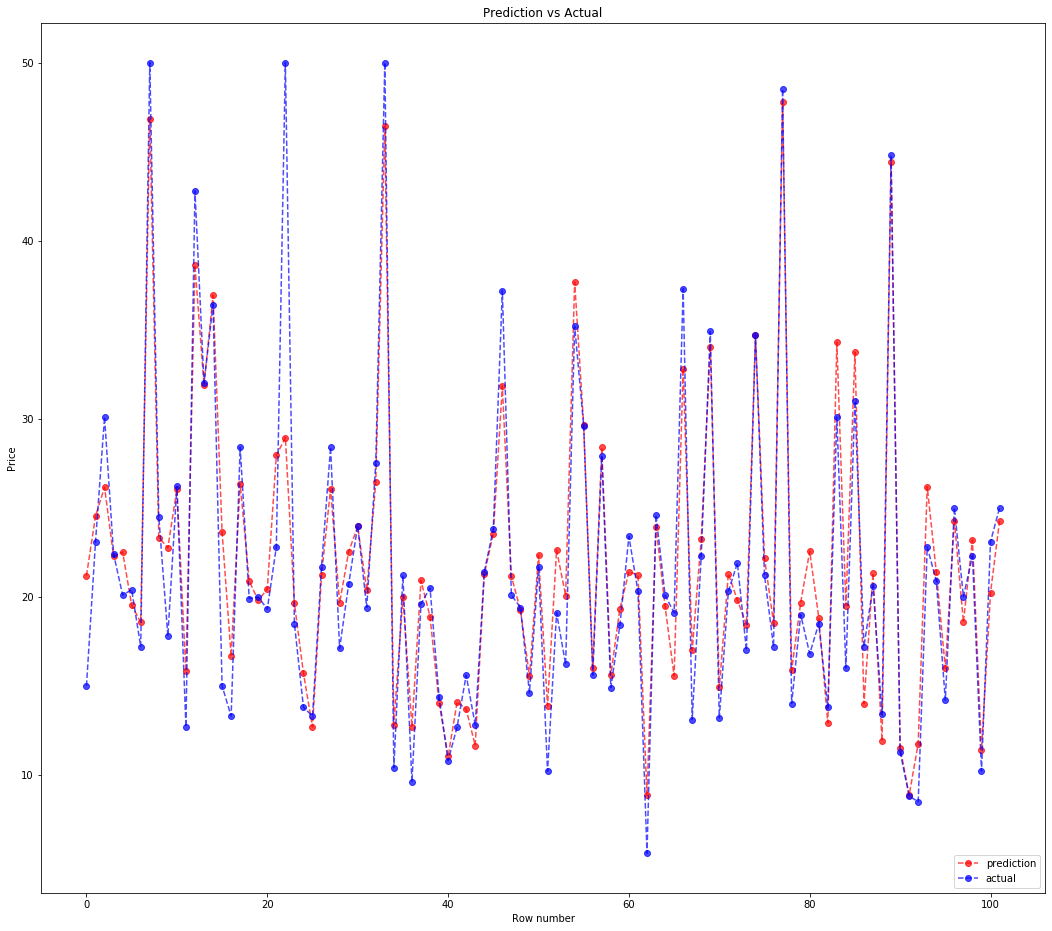